# Gravity attraction - Solid sphere

**Reference: Blakely (1996)**

In [1]:
# Importing all usefull libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Positions and number of points
n = 1000
x = np.linspace(-5000, 5000, n)
y = np.copy(x)
z = -100.
# Computes the mesh of all points
X, Y = np.meshgrid(x, y)

In [4]:
# Setting the parameters for a sphere
model1 = [2000., -2000., 700., 500., 2000.] # meters + kg/m3
model2 = [0., 2000., 700., 500., 3000.] # meters + kg/m3
model3 = [-2000., -2000., 700., 1000., 500.] # meters + kg/m3

In [5]:
# Importing the functions
from codes.sphere import sphere_gz # Gravity vertical attraction
from codes.auxiliars import addnoise # Noised function
from codes.statistical import analysis # Statistical module 

In [6]:
# Calculating the gravity attraction
gz = sphere_gz(X, Y, z, model1) + sphere_gz(X, Y, z, model2) + sphere_gz(X, Y, z, model3)

In [7]:
# Analyzing
_ = analysis(gz, 'mGal')

Minimum:    0.0650 mGal
Maximum:    22.0086 mGal
Mean value: 1.6388 mGal
Variation:  21.9436 mGal


In [8]:
# Adding noise e checking the new values
noised = addnoise(gz, 2.5, 0.15)
_ = analysis(noised, 'mGal')

Minimum:    2.0053 mGal
Maximum:    24.8256 mGal
Mean value: 4.1386 mGal
Variation:  22.8203 mGal


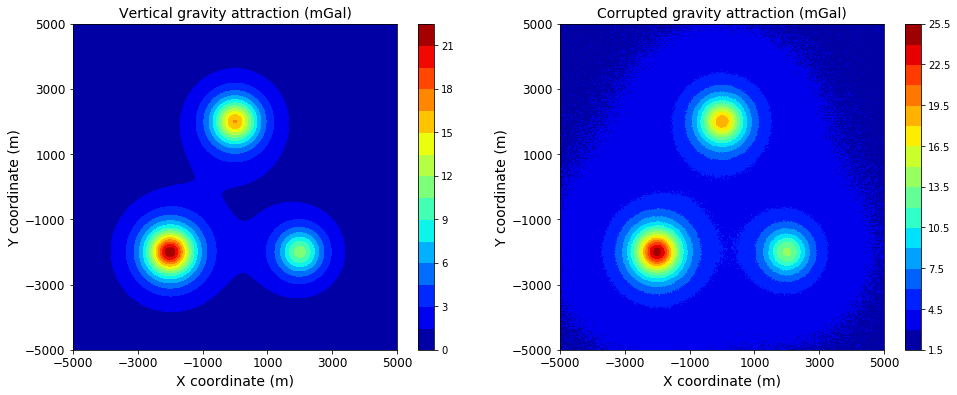

In [16]:
# Plotting the result for approximated total field anomaly
plt.close('all')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.contourf(X, Y, gz, 20, cmap = plt.cm.jet)
plt.title('Vertical gravity attraction (mGal)', fontsize = 14)
plt.xlabel('X coordinate (m)', fontsize = 14)
plt.ylabel('Y coordinate (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 6), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 6), fontsize = 12)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(X, Y, noised, 20, cmap = plt.cm.jet)
plt.title('Corrupted gravity attraction (mGal)', fontsize = 14)
plt.xlabel('X coordinate (m)', fontsize = 14)
plt.ylabel('Y coordinate (m)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 6), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 6), fontsize = 12)
plt.colorbar()

plt.savefig('figures/sphere-gz.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()